In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Replace the path with the correct path for the data.
# specify use of columns due to low memory
y2015 = pd.read_csv(
    '../Datasets/LoanStats3d.csv',
    skipinitialspace=True,
    header=1,
    usecols=['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
           'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
           'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
             'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
             'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
            'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
            'collection_recovery_fee', 'last_pymnt_amnt', 'next_pymnt_d', 'collections_12_mths_ex_med',
            'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
            'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
             'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
             'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
             'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
             'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
              'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
              'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
              'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
             'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
    )

c:\users\madga\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139,16000,16000,16000.0,60 months,14.85%,379.39,C,10+ years,...,0,2,78.9,0.0,0,2,298100,31329,281300,13400
1,68354783,73244544,9600,9600,9600.0,36 months,7.49%,298.58,A,8 years,...,0,2,100.0,66.7,0,0,88635,55387,12500,75635
2,68466916,73356753,25000,25000,25000.0,36 months,7.49%,777.55,A,10+ years,...,0,0,100.0,20.0,0,0,373572,68056,38400,82117
3,68466961,73356799,28000,28000,28000.0,36 months,6.49%,858.05,A,10+ years,...,0,0,91.7,22.2,0,0,304003,74920,41500,42503
4,68495092,73384866,8650,8650,8650.0,36 months,19.89%,320.99,E,8 years,...,0,12,100.0,50.0,1,0,38998,18926,2750,18248


In [4]:
#blind approach doesn't work on this because very memory intensive
#from sklearn import ensemble
#from sklearn.model_selection import cross_val_score

#rfc = ensemble.RandomForestClassifier()
#X = y2015.drop('loan_status', 1)
#Y = y2015['loan_status']
#X = pd.get_dummies(X)

#cross_val_score(rfc,X,Y, cv=5)

In [5]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

term
2
int_rate
80
grade
7
emp_length
11
home_ownership
4
verification_status
3
issue_d
5
loan_status
7
pymnt_plan
1
purpose
13
initial_list_status
2
next_pymnt_d
3
application_type
2
verification_status_joint
3


In [6]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# # Drop other columns with many unique variables
# y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
#             'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [7]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
175372,57764085,61516862,3600,3600,3600.0,36 months,10.99,117.85,B,8 years,...,0,4,82.6,0.0,0,0,183191,117933,19000,141317
175373,56652784,60334520,12000,12000,11950.0,36 months,12.29,400.24,C,5 years,...,0,3,97.1,60.0,0,0,263116,68198,16700,68916
175374,57882742,61635468,8400,8400,8400.0,36 months,7.89,262.80,A,1 year,...,0,2,100.0,100.0,0,0,238181,45652,4300,41886
175375,57684484,61437259,5000,5000,5000.0,36 months,11.53,164.96,B,< 1 year,...,0,5,100.0,50.0,0,0,260493,150876,6500,137593
175376,57704450,61457217,18000,18000,18000.0,60 months,9.17,375.14,B,3 years,...,0,0,100.0,25.0,0,0,69906,58708,33300,33806


In [8]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,initial_list_status_f,initial_list_status_w,next_pymnt_d_17-Feb,next_pymnt_d_17-Jan,next_pymnt_d_17-Mar,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401,72868139,16000,16000,16000.0,14.85,379.39,48000.00,33.18,0,...,0,1,0,1,0,1,0,0,0,0
1,68354783,73244544,9600,9600,9600.0,7.49,298.58,60000.00,22.44,0,...,0,1,0,1,0,1,0,0,0,0
2,68466916,73356753,25000,25000,25000.0,7.49,777.55,109000.00,26.02,0,...,0,1,0,0,0,1,0,0,0,0
3,68466961,73356799,28000,28000,28000.0,6.49,858.05,92000.00,21.60,0,...,0,1,0,1,0,1,0,0,0,0
4,68495092,73384866,8650,8650,8650.0,19.89,320.99,55000.00,25.49,0,...,0,1,0,0,0,1,0,0,0,0
5,68506798,73396623,23000,23000,23000.0,8.49,471.77,64000.00,18.28,0,...,0,1,0,1,0,1,0,0,0,0
6,68566886,73456723,29900,29900,29900.0,12.88,678.49,65000.00,21.77,0,...,0,1,1,0,0,1,0,0,0,0
7,68577849,73467703,18000,18000,18000.0,11.99,400.31,112000.00,8.68,0,...,0,1,0,0,0,1,0,0,0,0
8,66310712,71035433,35000,35000,35000.0,14.85,829.90,110000.00,17.06,0,...,0,1,0,1,0,1,0,0,0,0
9,68476807,73366655,10400,10400,10400.0,22.45,289.91,104433.00,25.37,1,...,0,1,0,0,0,1,0,0,0,0


In [9]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([0.96328392, 0.96675979, 0.96550545, 0.96556246, 0.96367887,
       0.9607709 , 0.96139591, 0.96133668, 0.96025319, 0.95985173])

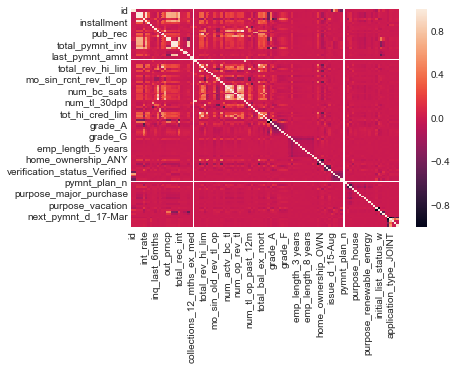

In [10]:
sns.set_style('white')
sns.heatmap(X.corr())

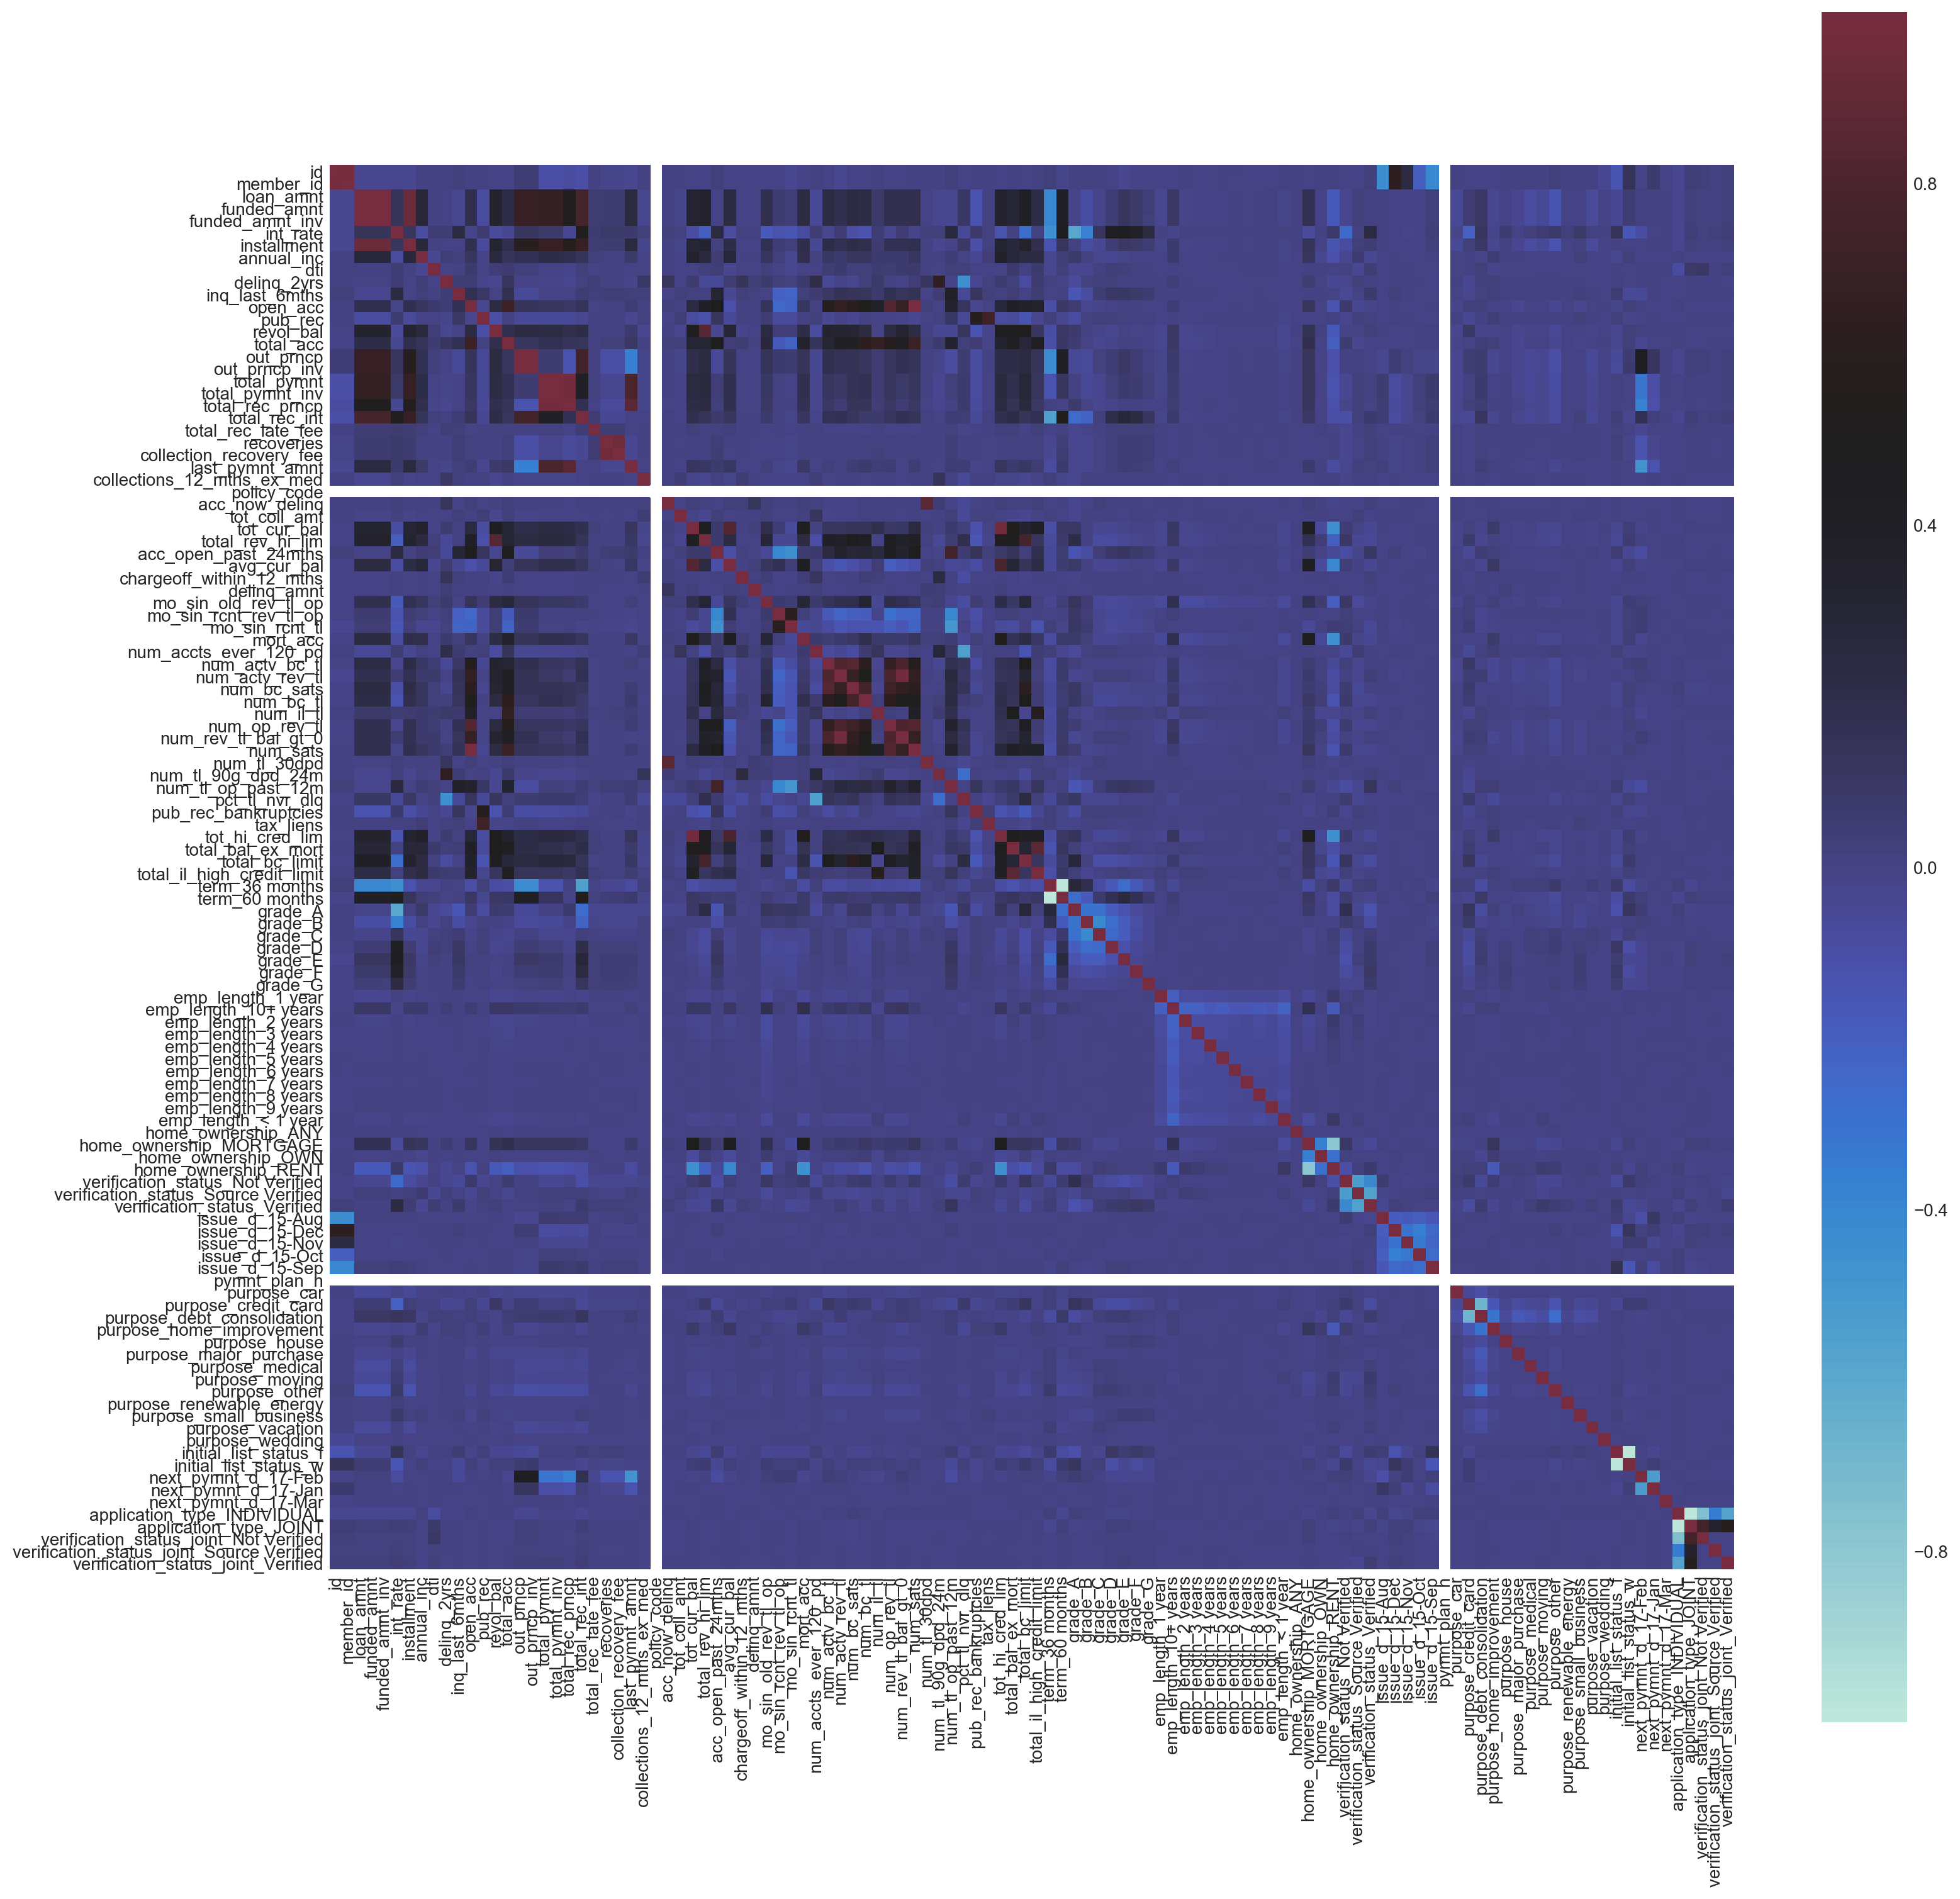

In [11]:
#heatmap is uninformative; zoom in
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(X.corr(), xticklabels=True, yticklabels=True, square=True, center=0.5)

In [12]:
#remove completely non correlated info
reduce = X.iloc[:, :60]

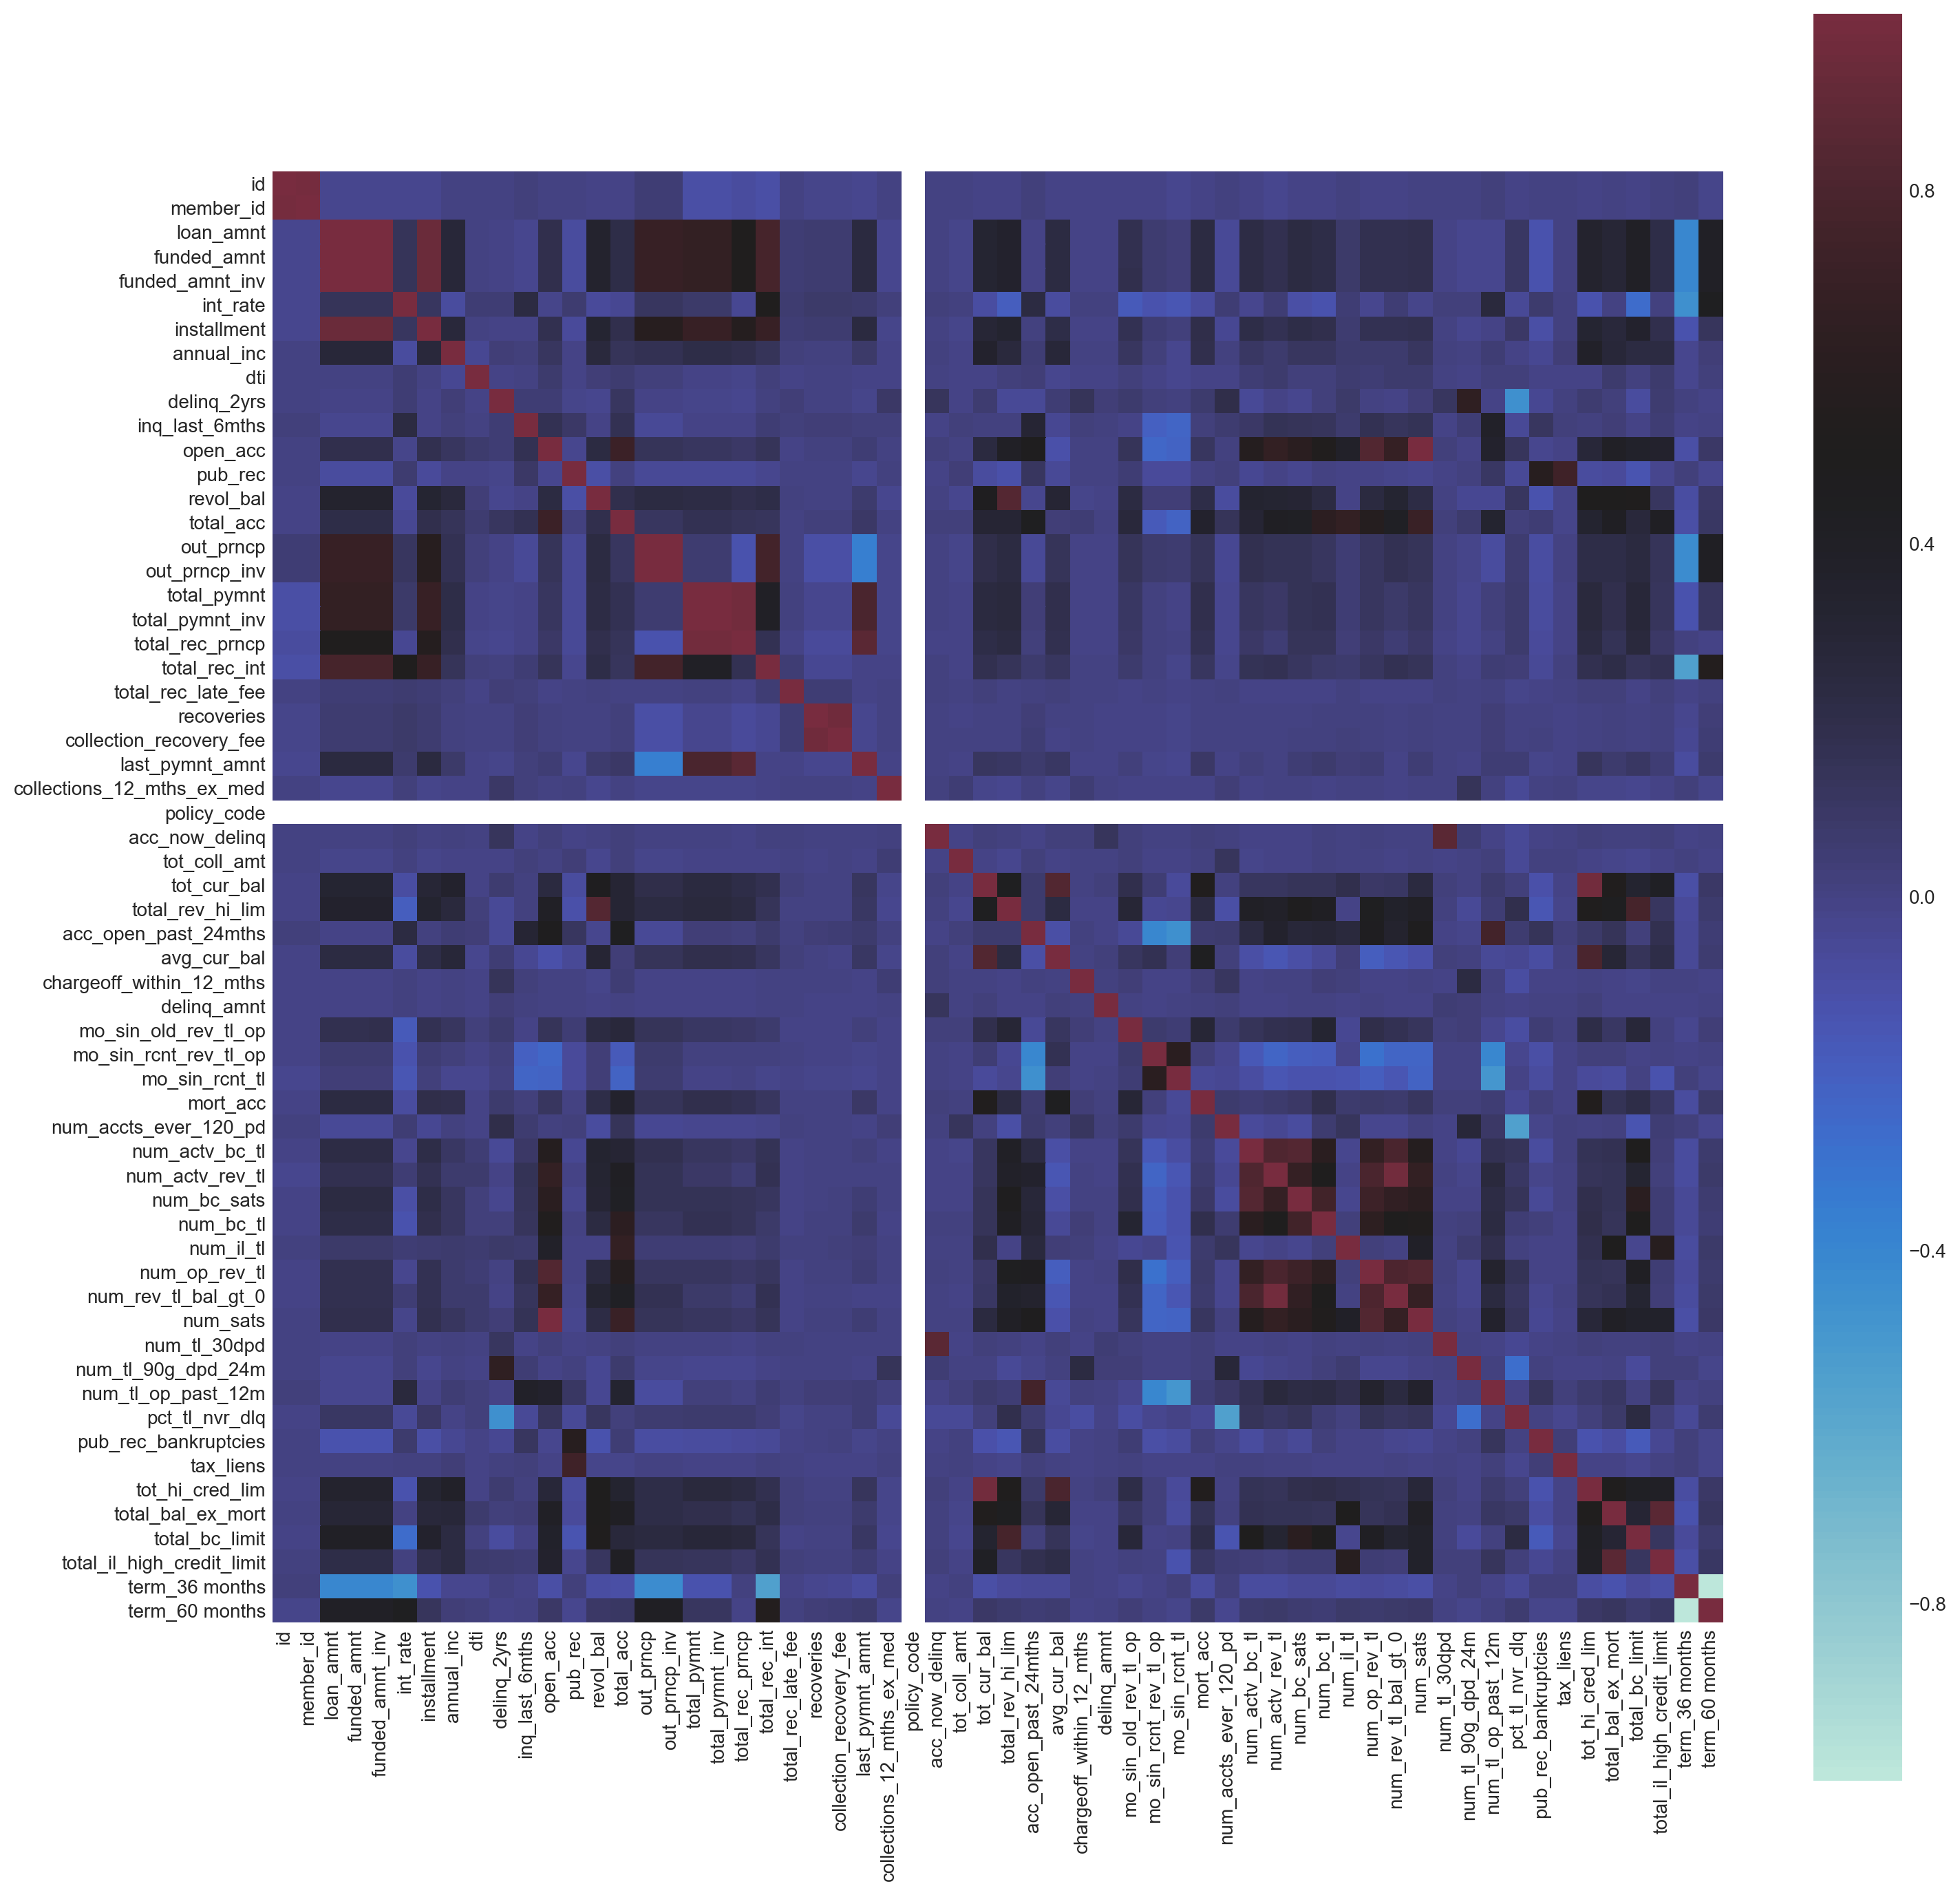

In [13]:
plt.figure(dpi=200, figsize=(17,17))
sns.heatmap(reduce.corr(), xticklabels=True, yticklabels=True, square=True, center=0.5)

In [14]:
# remove no correlation, n/a, grouped
reduce.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'policy_code', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'acc_now_delinq', 'tot_coll_amt'], axis=1, inplace=True)

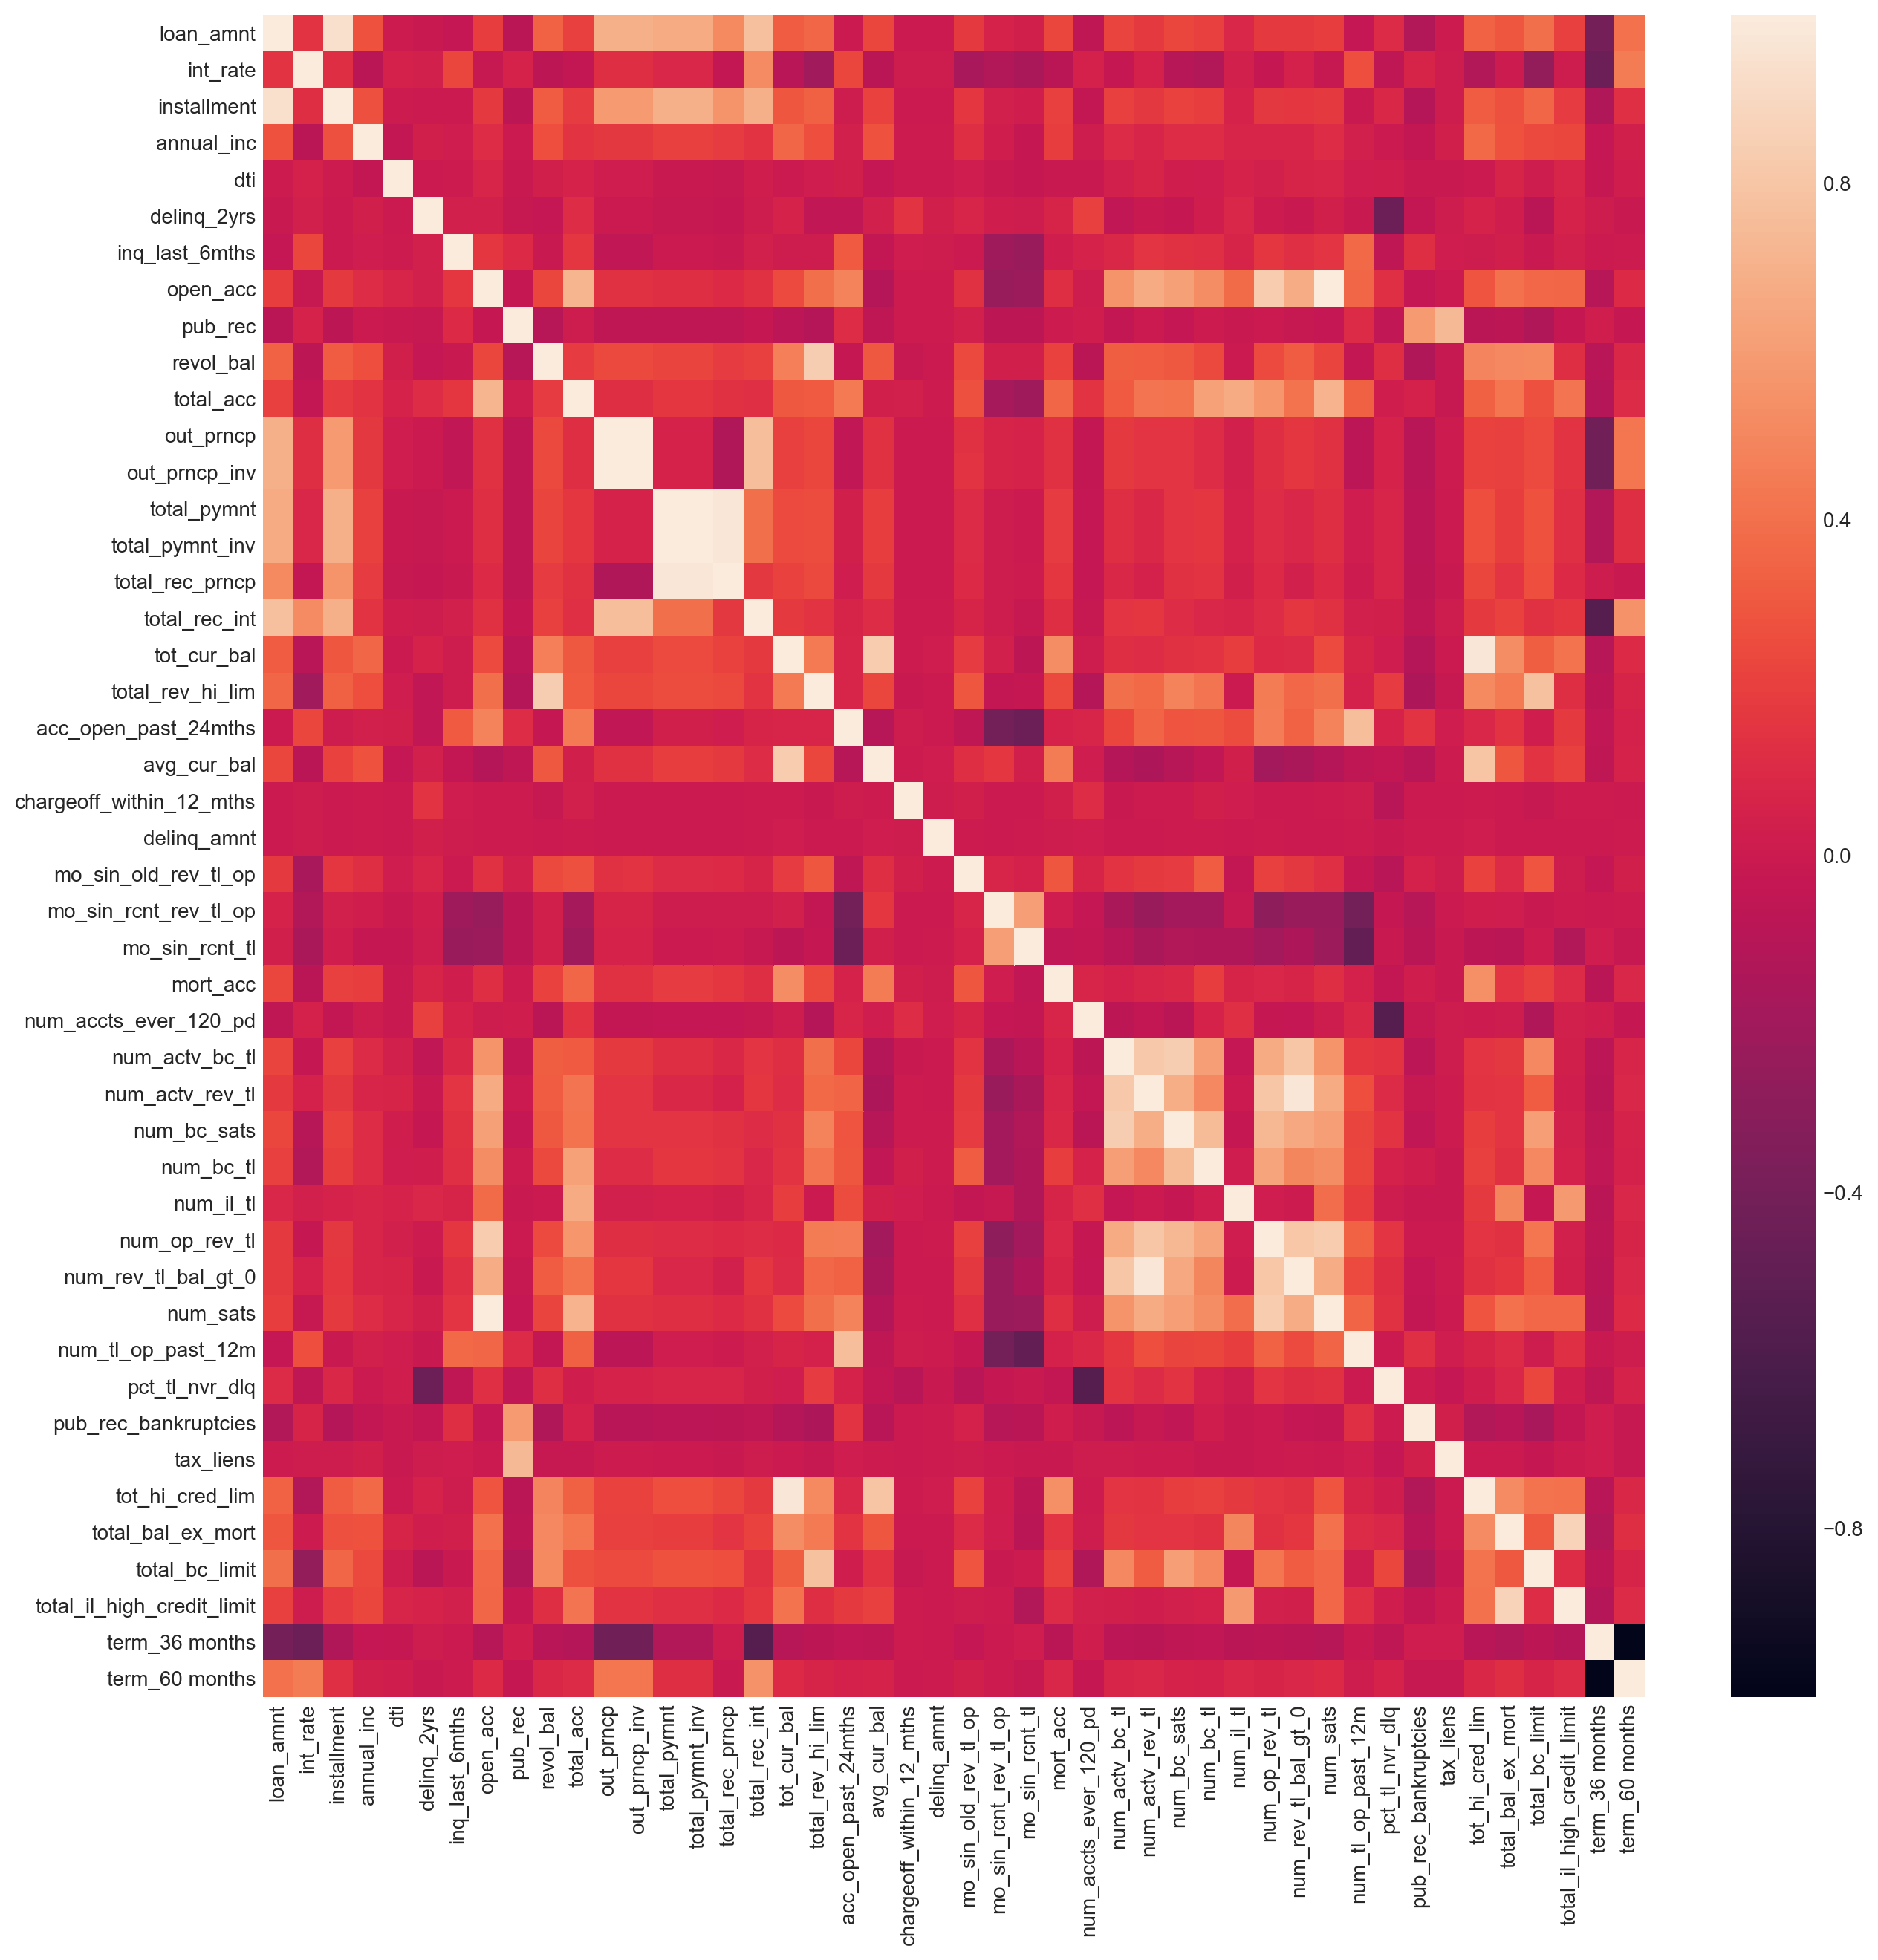

In [15]:
plt.figure(dpi=200, figsize=(15,15))
sns.heatmap(reduce.corr())

In [16]:
#X = X.drop(['loan_status', 'loan_status2'], axis=1)
cross_val_score(rfc, reduce, Y, cv=10)

array([0.95735462, 0.97109299, 0.97109299, 0.96675979, 0.96664386,
       0.96265253, 0.96185208, 0.9604813 , 0.95996807, 0.95950955])

In [17]:
len(reduce.columns)

46

In [18]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
pca = StandardScaler().fit_transform(reduce)

# The NumPy covariance function assumes that variables are represented by rows not columns, so we transpose X.
pcaT = pca.T
Cx = np.cov(pcaT)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.0000057   0.14624911  0.94289391 ...  0.20608118 -0.40369386
   0.40369386]
 [ 0.14624911  1.0000057   0.11988708 ...  0.01145309 -0.45073446
   0.45073446]
 [ 0.94289391  0.11988708  1.0000057  ...  0.1828292  -0.12618552
   0.12618552]
 ...
 [ 0.20608118  0.01145309  0.1828292  ...  1.0000057  -0.10455212
   0.10455212]
 [-0.40369386 -0.45073446 -0.12618552 ... -0.10455212  1.0000057
  -1.0000057 ]
 [ 0.40369386  0.45073446  0.12618552 ...  0.10455212 -1.0000057
   1.0000057 ]]


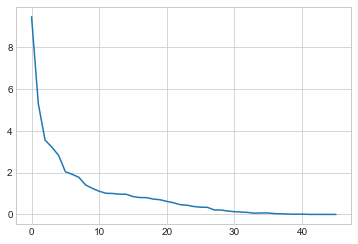

In [19]:
# Calculating eigenvalues and eigenvectors.
sns.set_style('whitegrid')
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

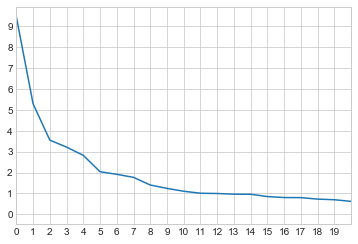

In [20]:
#zoom in
plt.plot(eig_val_cov)
plt.xticks(np.arange(0, 20, step=1))
plt.yticks(np.arange(0, 10, 1))
plt.xlim(0,20)
plt.show()

In [57]:
#check eigenvalues and eigenvectors
for i in range(6):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, -1).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print(40*'-')
    
print('Percentage of total variance in dataset explained by each component calculated by hand.\n', eig_val_cov / sum(eig_val_cov)) 

Eigenvector 1: 
[[-0.20814376]
 [-0.01257411]
 [-0.19177308]
 [-0.10832816]
 [-0.01884802]
 [-0.00118839]
 [-0.04519302]
 [-0.24530681]
 [ 0.02626185]
 [-0.18201315]
 [-0.21601597]
 [-0.14335276]
 [-0.14335795]
 [-0.15054485]
 [-0.15055103]
 [-0.12119342]
 [-0.1556614 ]
 [-0.17298923]
 [-0.22064781]
 [-0.12202471]
 [-0.0703254 ]
 [-0.00109939]
 [-0.00074403]
 [-0.0986245 ]
 [ 0.05747583]
 [ 0.06221001]
 [-0.11285073]
 [ 0.01133794]
 [-0.21451453]
 [-0.21859442]
 [-0.22583687]
 [-0.20588344]
 [-0.08466091]
 [-0.23326584]
 [-0.21695874]
 [-0.24465251]
 [-0.0939391 ]
 [-0.05538653]
 [ 0.03395243]
 [ 0.00389588]
 [-0.18756304]
 [-0.17810208]
 [-0.20925863]
 [-0.12503134]
 [ 0.09030405]
 [-0.09030405]]
Eigenvalue 1: 9.442743410517668
----------------------------------------
Eigenvector 2: 
[[ 0.26141593]
 [ 0.0305606 ]
 [ 0.23811933]
 [ 0.10390414]
 [-0.02025359]
 [ 0.00517539]
 [-0.1099572 ]
 [-0.20113768]
 [-0.062069  ]
 [ 0.09374631]
 [-0.12098959]
 [ 0.18725785]
 [ 0.18726845]
 [ 0.2006

In [35]:
#1, 3, 8, 10, 11, 14, 15, 17, 18, 19, 29, 30, 31, 32, 34, 35, 36, 41, 42, 43
list(reduce.columns)

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'term_36 months',
 'term_60 months']

In [66]:
pca_reduce = reduce[['loan_amnt', 'installment', 'open_acc', 'revol_bal', 'total_acc', 'out_prncp', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'tot_cur_bal', 'total_rev_hi_lim', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats',
       'num_bc_tl', 'num_op_rev_tl', 'num_rev_tl_bal_gt_0', 'num_sats', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit']]

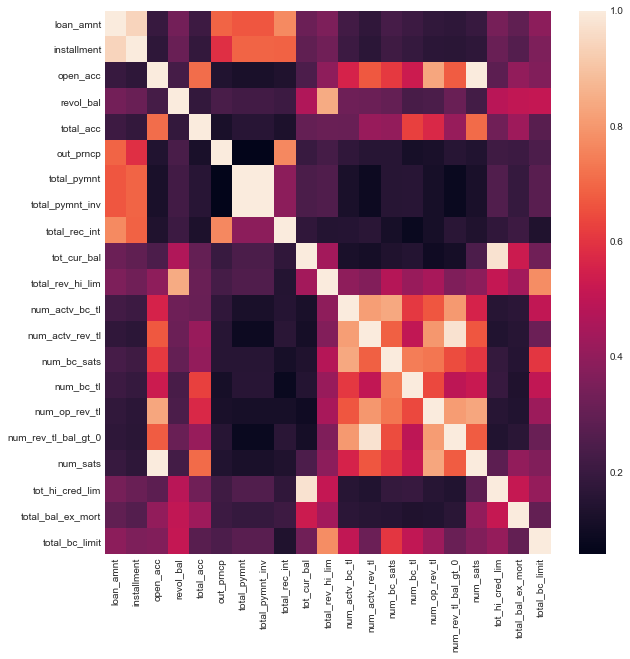

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(pca_reduce.corr())

In [68]:
pca_reduce.drop(['tot_hi_cred_lim', 'total_bal_ex_mort', 'installment', 'revol_bal'], axis=1, inplace=True)

c:\users\madga\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


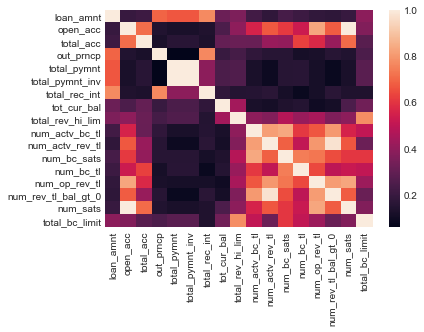

In [69]:
sns.heatmap(pca_reduce.corr())

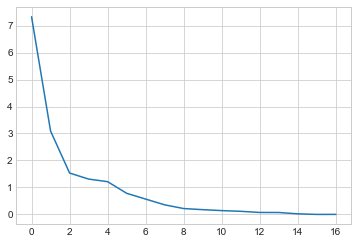

In [70]:
# Normalize the data so that all variables have a mean of 0 and standard deviation of 1.
pca = StandardScaler().fit_transform(pca_reduce)

# The NumPy covariance function assumes that variables are represented by rows not columns, so we transpose X.
pcaT = pca.T
Cx = np.cov(pcaT)

# Calculating eigenvalues and eigenvectors.
sns.set_style('whitegrid')
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

plt.plot(eig_val_cov)
plt.show()

In [71]:
#check eigenvalues and eigenvectors
for i in range(4):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, -1).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i+1, eig_val_cov[i]))
    print(40*'-')
    
print('Percentage of total variance in dataset explained by each component calculated by hand.\n', eig_val_cov / sum(eig_val_cov)) 

Eigenvector 1: 
[[-0.17044451]
 [-0.30869262]
 [-0.24253982]
 [-0.11681333]
 [-0.12173029]
 [-0.12174407]
 [-0.1195623 ]
 [-0.12283094]
 [-0.23140755]
 [-0.29564982]
 [-0.30239329]
 [-0.30649322]
 [-0.27200106]
 [-0.32154413]
 [-0.30059005]
 [-0.30770123]
 [-0.23540701]]
Eigenvalue 1: 7.3284280963377615
----------------------------------------
Eigenvector 2: 
[[-0.46581031]
 [ 0.13671197]
 [ 0.05446113]
 [-0.28525975]
 [-0.41427891]
 [-0.41426365]
 [-0.38881192]
 [-0.18346797]
 [-0.10789638]
 [ 0.11334284]
 [ 0.1620133 ]
 [ 0.09989768]
 [ 0.07986115]
 [ 0.16494273]
 [ 0.16313467]
 [ 0.13553545]
 [-0.1123926 ]]
Eigenvalue 2: 3.0922802870217954
----------------------------------------
Eigenvector 3: 
[[ 0.15794583]
 [ 0.00067497]
 [-0.09180528]
 [ 0.58709932]
 [-0.36523289]
 [-0.36536204]
 [ 0.44357934]
 [-0.15928674]
 [-0.18884772]
 [ 0.07445416]
 [ 0.13839721]
 [-0.03763989]
 [-0.1152634 ]
 [ 0.01833972]
 [ 0.14493893]
 [ 0.00087866]
 [-0.19108105]]
Eigenvalue 3: 1.5339583634032221
---

In [72]:
list(pca_reduce.columns)

['loan_amnt',
 'open_acc',
 'total_acc',
 'out_prncp',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_int',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_op_rev_tl',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'total_bc_limit']

In [64]:
pca_reduce.drop('total_rec_int', 1, inplace=True)

c:\users\madga\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
cross_val_score(rfc, pca_reduce, Y, cv=10)

array([0.95102623, 0.96841325, 0.96852728, 0.96470722, 0.96550348,
       0.96202532, 0.96156697, 0.96002509, 0.95996807, 0.95922441])

In [77]:
final_reduce = pca_reduce.drop(['loan_amnt', 'total_bc_limit'], 1)

In [78]:
final_reduce.head()

,open_acc,total_acc,out_prncp,total_pymnt,total_pymnt_inv,total_rec_int,tot_cur_bal,total_rev_hi_lim,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats
0,11,19,13668.88,4519.68,4519.68,2188.56,31329,284700,6,9,6,8,9,9,11
1,7,9,6635.69,3572.97,3572.97,608.66,55387,13000,3,3,3,3,4,3,7
2,9,19,0.00,26224.23,26224.23,1224.23,305781,38400,3,3,5,6,5,3,9
3,16,24,19263.77,10271.36,10271.36,1535.13,221110,79900,7,9,9,11,13,9,16
4,18,19,0.00,9190.49,9190.49,540.49,18926,20750,2,17,2,2,17,13,18


In [79]:
cross_val_score(rfc, final_reduce, Y, cv=10)

array([0.95712657, 0.96037402, 0.96031701, 0.95866355, 0.95894629,
       0.95672255, 0.95683412, 0.95671761, 0.95654653, 0.95551754])